<a href="https://colab.research.google.com/github/AayushMhrzn/60DaysLearning/blob/main/Day-11/3D_to_2D_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# 1. Define the 3D cube
cube_vertices = np.array([
    [-1, -1, -1],
    [ 1, -1, -1],
    [ 1,  1, -1],
    [-1,  1, -1],
    [-1, -1,  1],
    [ 1, -1,  1],
    [ 1,  1,  1],
    [-1,  1,  1],
])


In [10]:
# Define cube edges (for plotting)
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # bottom
    (4, 5), (5, 6), (6, 7), (7, 4),  # top
    (0, 4), (1, 5), (2, 6), (3, 7)   # vertical
]

In [11]:
# 2. Define Camera Parameters
# Intrinsic matrix (focal lengths fx, fy and principal point cx, cy)
fx, fy = 800, 800
cx, cy = 400, 300
K = np.array([
    [fx, 0, cx],
    [0, fy, cy],
    [0,  0,  1]
])

In [12]:
# Extrinsic: Rotation (identity) and translation (move camera back)
R = np.eye(3)
t = np.array([[0], [0], [5]])  # move 5 units along Z

In [13]:
# Projection matrix: P = K * [R | t]
Rt = np.hstack((R, t))  # 3x4 matrix
P = K @ Rt  # 3x4 projection matrix

In [14]:
# 3. Project 3D points to 2D
homogeneous_vertices = np.hstack((cube_vertices, np.ones((cube_vertices.shape[0], 1))))  # N x 4
projected = (P @ homogeneous_vertices.T).T  # N x 3
projected_2D = projected[:, :2] / projected[:, 2, np.newaxis]  # normalize by z

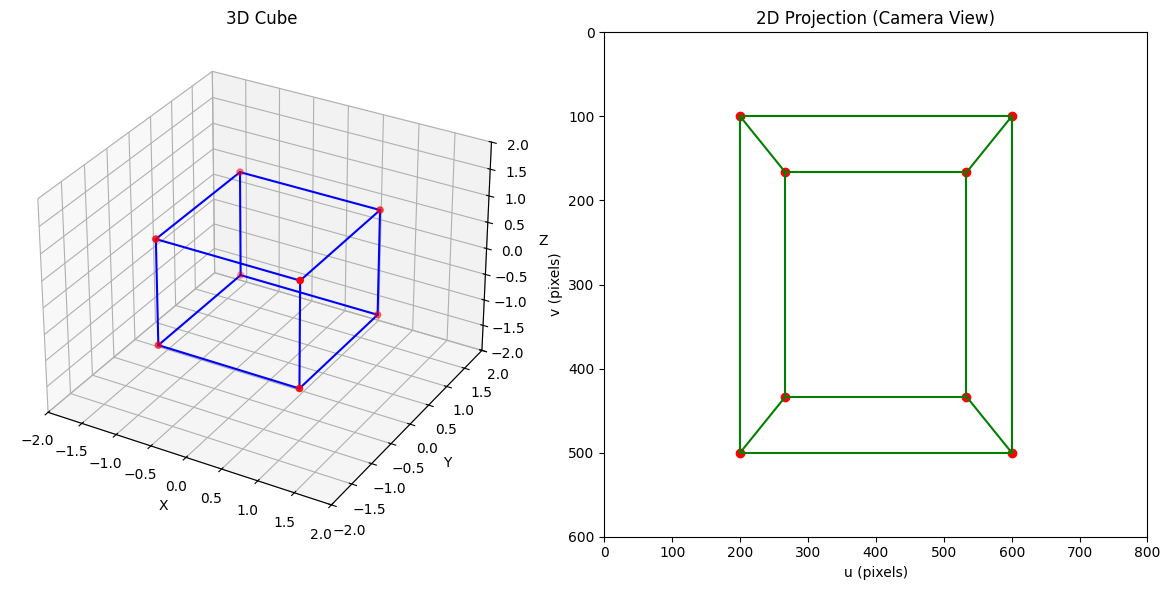

In [20]:
# 4. Plot both 3D and 2D
fig = plt.figure(figsize=(12, 6))

# 3D plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title("3D Cube")
ax1.scatter(cube_vertices[:, 0], cube_vertices[:, 1], cube_vertices[:, 2], color='red')

for edge in edges:
    p1, p2 = cube_vertices[edge[0]], cube_vertices[edge[1]]
    ax1.plot(*zip(p1, p2), color='blue')

ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
ax1.set_zlim([-2, 2])

# 2D Projection Plot
ax2 = fig.add_subplot(122)
ax2.set_title("2D Projection (Camera View)")
ax2.scatter(projected_2D[:, 0], projected_2D[:, 1], color='red')

for edge in edges:
    p1, p2 = projected_2D[edge[0]], projected_2D[edge[1]]
    ax2.plot(*zip(p1, p2), color='green')

ax2.set_xlim(0, 800)
ax2.set_ylim(600, 0)  # Flip Y-axis to match image coordinates
ax2.set_xlabel("u (pixels)")
ax2.set_ylabel("v (pixels)")

plt.tight_layout()
plt.show()